# IMMOWEB PROJECT: EXPLORATORY DATA ANALYSIS

## LIBRARIES AND SETTINGS

In [1]:
# Set the notebook to show all outputs in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#from ydata_profiling import ProfileReport

# This is for reading the locality name properly. In avoiding the encoding error
import csv
import os

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Pandas options for data wrangling and output set-up 
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.expand_frame_repr', False) # print all columns and in the same line
pd.set_option('display.max_colwidth', None) # display the full content of each cell
pd.set_option('display.float_format', lambda x: '%.2f' %x) # floats to be displayed with 2 decimal places

# Visualisation libraries and set-up
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Set up visualisation preferences
plt.rcParams['font.family'] = "serif"  # Use serif fonts for plots
sns.set_style('whitegrid')  # Set seaborn grid style
# sns.set_style('darkgrid')

## FUNCTIONS USED RECURRENTLY

In [2]:
# Function to run basic data frame description
def Descriptives(df):
    print("Looking at the shape to see the number of records:", df.shape)
    print("\nDescription of the file to check values range:")
    print(df.describe().transpose())
    print("\nAttributes and respective data types:")
    print(df.info())

def MemOptimisation(df):
    print(f"\nAmount of memory used by all attributes: {df.memory_usage(deep=True).sum()}\n")
    
    # Optimise memory usage
    for i in categoric_cols:
        df[i] = df[i].astype('category')
    for i in numeric_cols:
        df[i] = pd.to_numeric(df[i], downcast='integer')
        df[i] = pd.to_numeric(df[i], downcast='float')    

    print(df.info(memory_usage='deep'))
    print("\nAmount of memory used now by all attributes: ",df.memory_usage(deep=True).sum())
    
# Function to check the missing values (NaNs)
def Missing(df):
    try:
        assert df.notnull().all().all()
        print("Good news! There are no missing values.")
    
    except AssertionError:
        print("Count of missing values:")
        print(df.isna().sum())
        print("\nPercentage of missing values:")
        print(df.isna().mean().round(4)*100, "\n")



In [3]:
def Plot_numeric(x):
    
    print(f'\n*** {x.upper()} ***')
    
    fig = plt.figure(figsize=(15, 3))
    
    plt.subplot(121)
    sns.distplot(df[x], color = 'salmon')
    plt.xlabel('')
    plt.title(f'{x} Distribution')
    
    plt.subplot(122)
    sns.boxplot(x=df[x], color = 'salmon', width=0.4, linewidth=2) 
    plt.xlabel('')
    plt.title(f'{x} Boxplot')
    
    plt.show()

In [4]:
def Plot_category(x):
    print(f'\n*** {x.upper()} ***')

    # Sort the categories by count
    order = df[x].value_counts().index

    fig, ax = plt.subplots(figsize=(10, 3))

    sns.countplot(data=df, y=df[x], order=order, color='salmon', width=0.4, ax=ax)

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'{x.upper()} COUNT')

    # Add count labels to bars
    for p in ax.patches:
        count = int(p.get_width())
        ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2,
                f'{count:,}', va='center')

    plt.show()

## START OF ANALYSIS: LOAD DATA & CLEAN THE VARIABLES

In [19]:
# Load the data (CSV file)
df = pd.read_csv("Cleaned - immoweb-dataset.csv")

In [20]:
# Split the variables into numerical and categorical cols, as different actions to be take for each variable type
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

categoric_cols = df.select_dtypes(exclude=np.number).columns
categoric_cols

Index(['postCode', 'hasAttic', 'hasBasement', 'hasGarden',
       'parkingCountIndoor', 'parkingCountOutdoor', 'hasSwimmingPool',
       'hasTerrace', 'price'],
      dtype='object')

Index(['type', 'subtype', 'bedroomCount', 'bathroomCount', 'region',
       'province', 'habitableSurface', 'buildingCondition', 'hasLift',
       'floodZoneType', 'heatingType', 'kitchenType', 'landSurface',
       'toiletCount', 'epcScore'],
      dtype='object')

# THINGS TO DO
Variables coded 0/1 are not numeric, should be category  
postCode also category  
improve Plot_numeric(i) to show as well the count of values below lower limit and upper limit  
decide what to do with outliers  

There are numeric variables that show as category as we added value "No info", plot excluding category == No info

Look at correlation

Answer the questions using plots


Cleaning numeric columns...
  - bedroomCount: Converting 1952 'No info' values to NaN
  - bathroomCount: Converting 7570 'No info' values to NaN
  - habitableSurface: Converting 8590 'No info' values to NaN
  - toiletCount: Converting 21280 'No info' values to NaN
Dataset shape after cleaning: (76370, 24)

DATASET OVERVIEW
Total rows: 76,370
Total columns: 24

Qualitative variables: 16
Quantitative variables: 8

MISSING VALUES ANALYSIS
              Column  Missing Count  Percentage
7        landSurface          36833   48.229671
6        kitchenType          34458   45.119811
4      floodZoneType          33466   43.820872
8        toiletCount          21280   27.864345
5        heatingType          20345   26.640042
3  buildingCondition          18381   24.068351
9           epcScore          11987   15.695954
2   habitableSurface           8590   11.247872
1      bathroomCount           7570    9.912269
0       bedroomCount           1952    2.555977


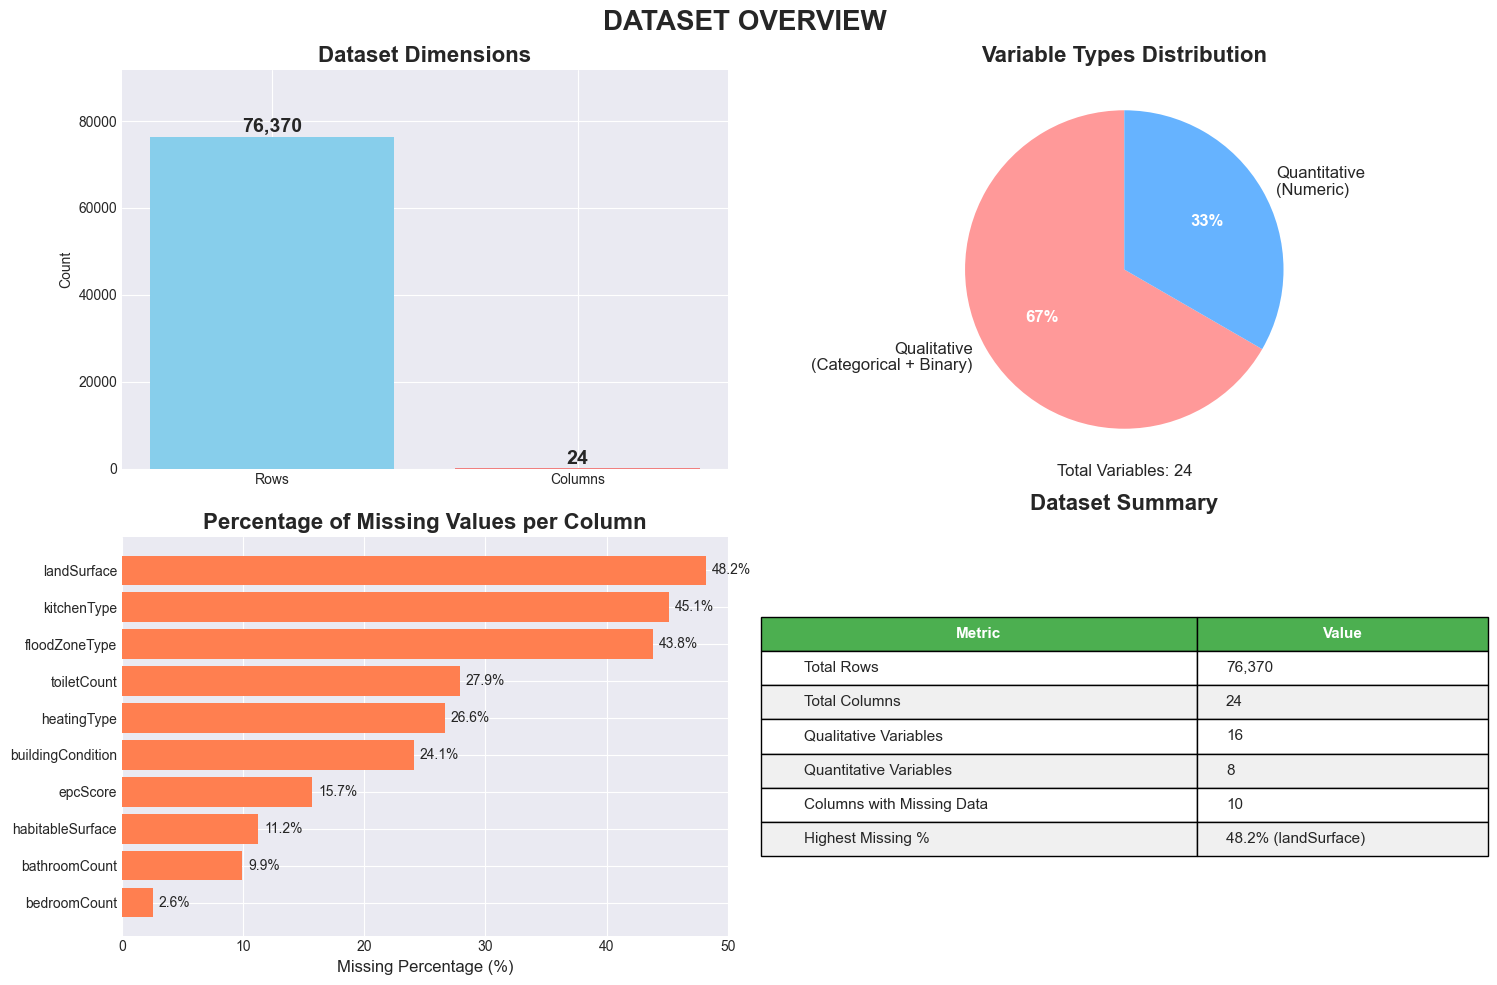

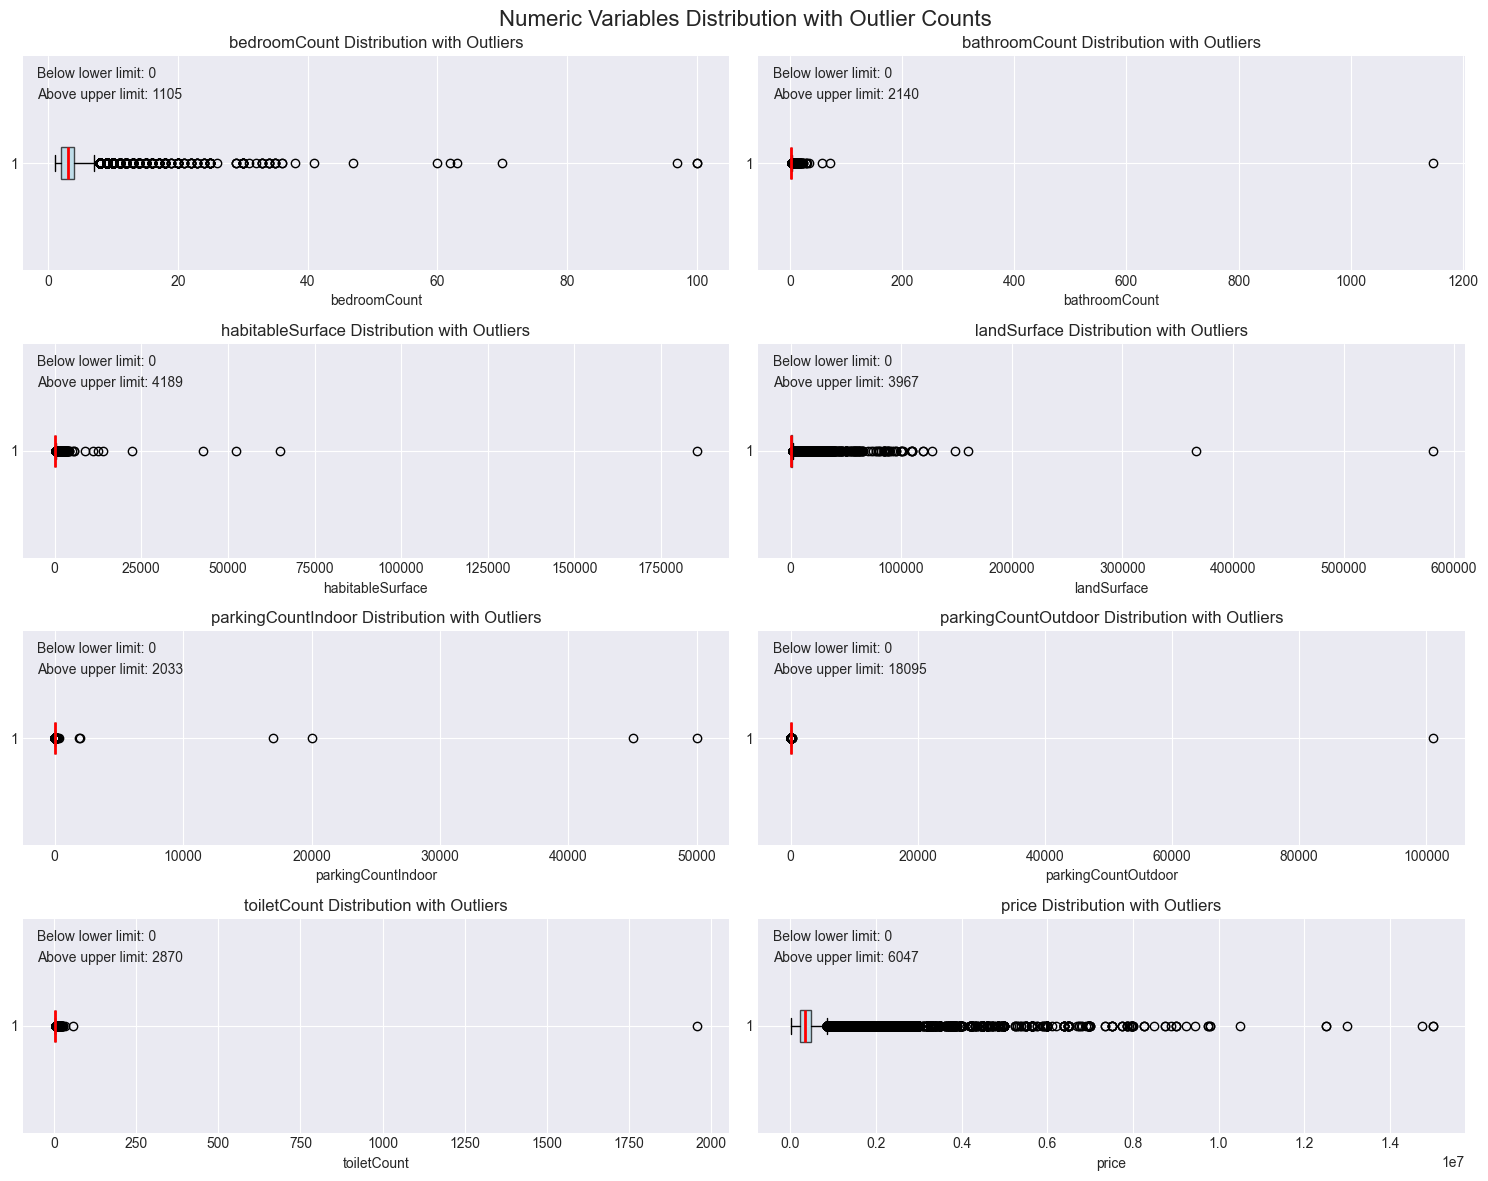


COMPREHENSIVE CORRELATION ANALYSIS WITH PRICE

1. NUMERIC VARIABLES - Correlation with Price:
bedroomCount: 0.3686
landSurface: 0.2261
bathroomCount: 0.1119
habitableSurface: 0.0979
toiletCount: 0.0958
parkingCountOutdoor: 0.0067
parkingCountIndoor: -0.0004

CORRELATION ANALYSIS(numeric) WITH PRICE

Correlations with Price (sorted by absolute value):
bedroomCount: 0.3686
landSurface: 0.2261
bathroomCount: 0.1119
habitableSurface: 0.0979
toiletCount: 0.0958
parkingCountOutdoor: 0.0067
parkingCountIndoor: -0.0004

Variables with GREATEST influence on price (|correlation| > 0.3):
  - bedroomCount: 0.3686

Variables with LEAST influence on price (|correlation| < 0.1):
  - habitableSurface: 0.0979
  - toiletCount: 0.0958
  - parkingCountOutdoor: 0.0067
  - parkingCountIndoor: -0.0004

2. CATEGORICAL VARIABLES - Association with Price (ANOVA):

Effect size interpretation: Weak < 0.06, Medium 0.06-0.14, Strong > 0.14
             Variable  F-statistic        p-value  Eta-squared  Effect
4   

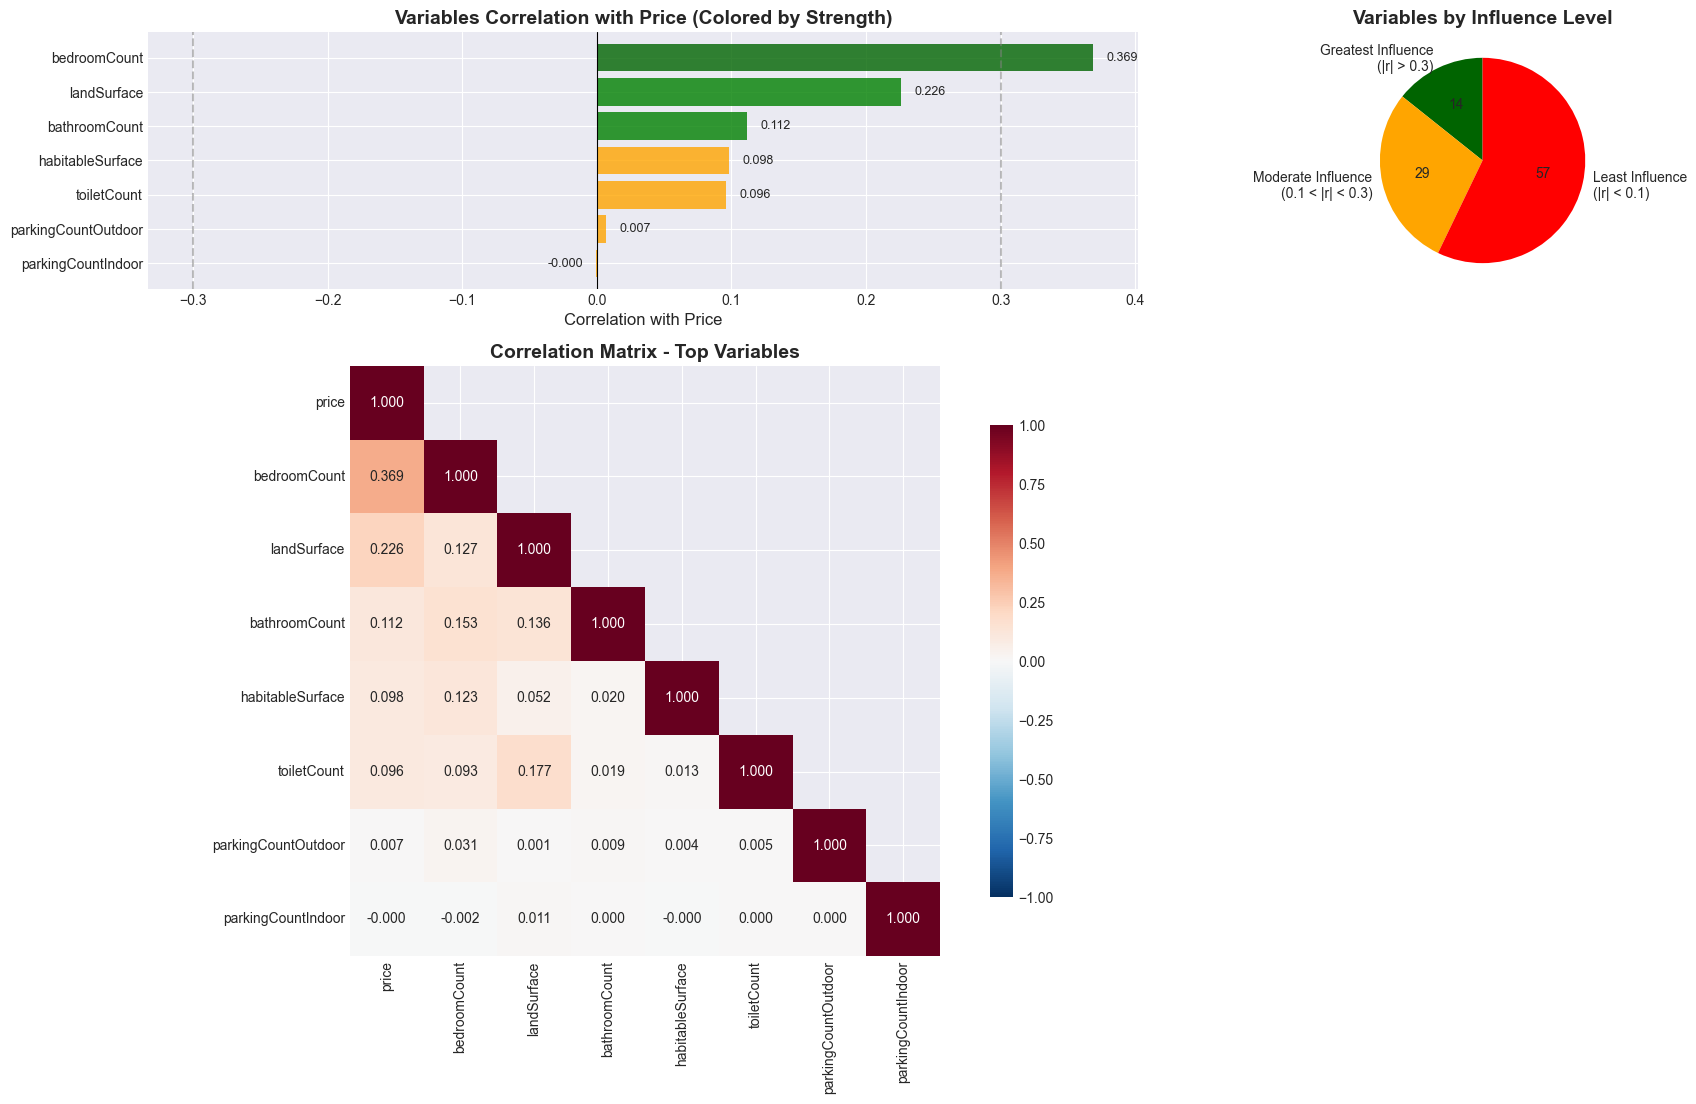

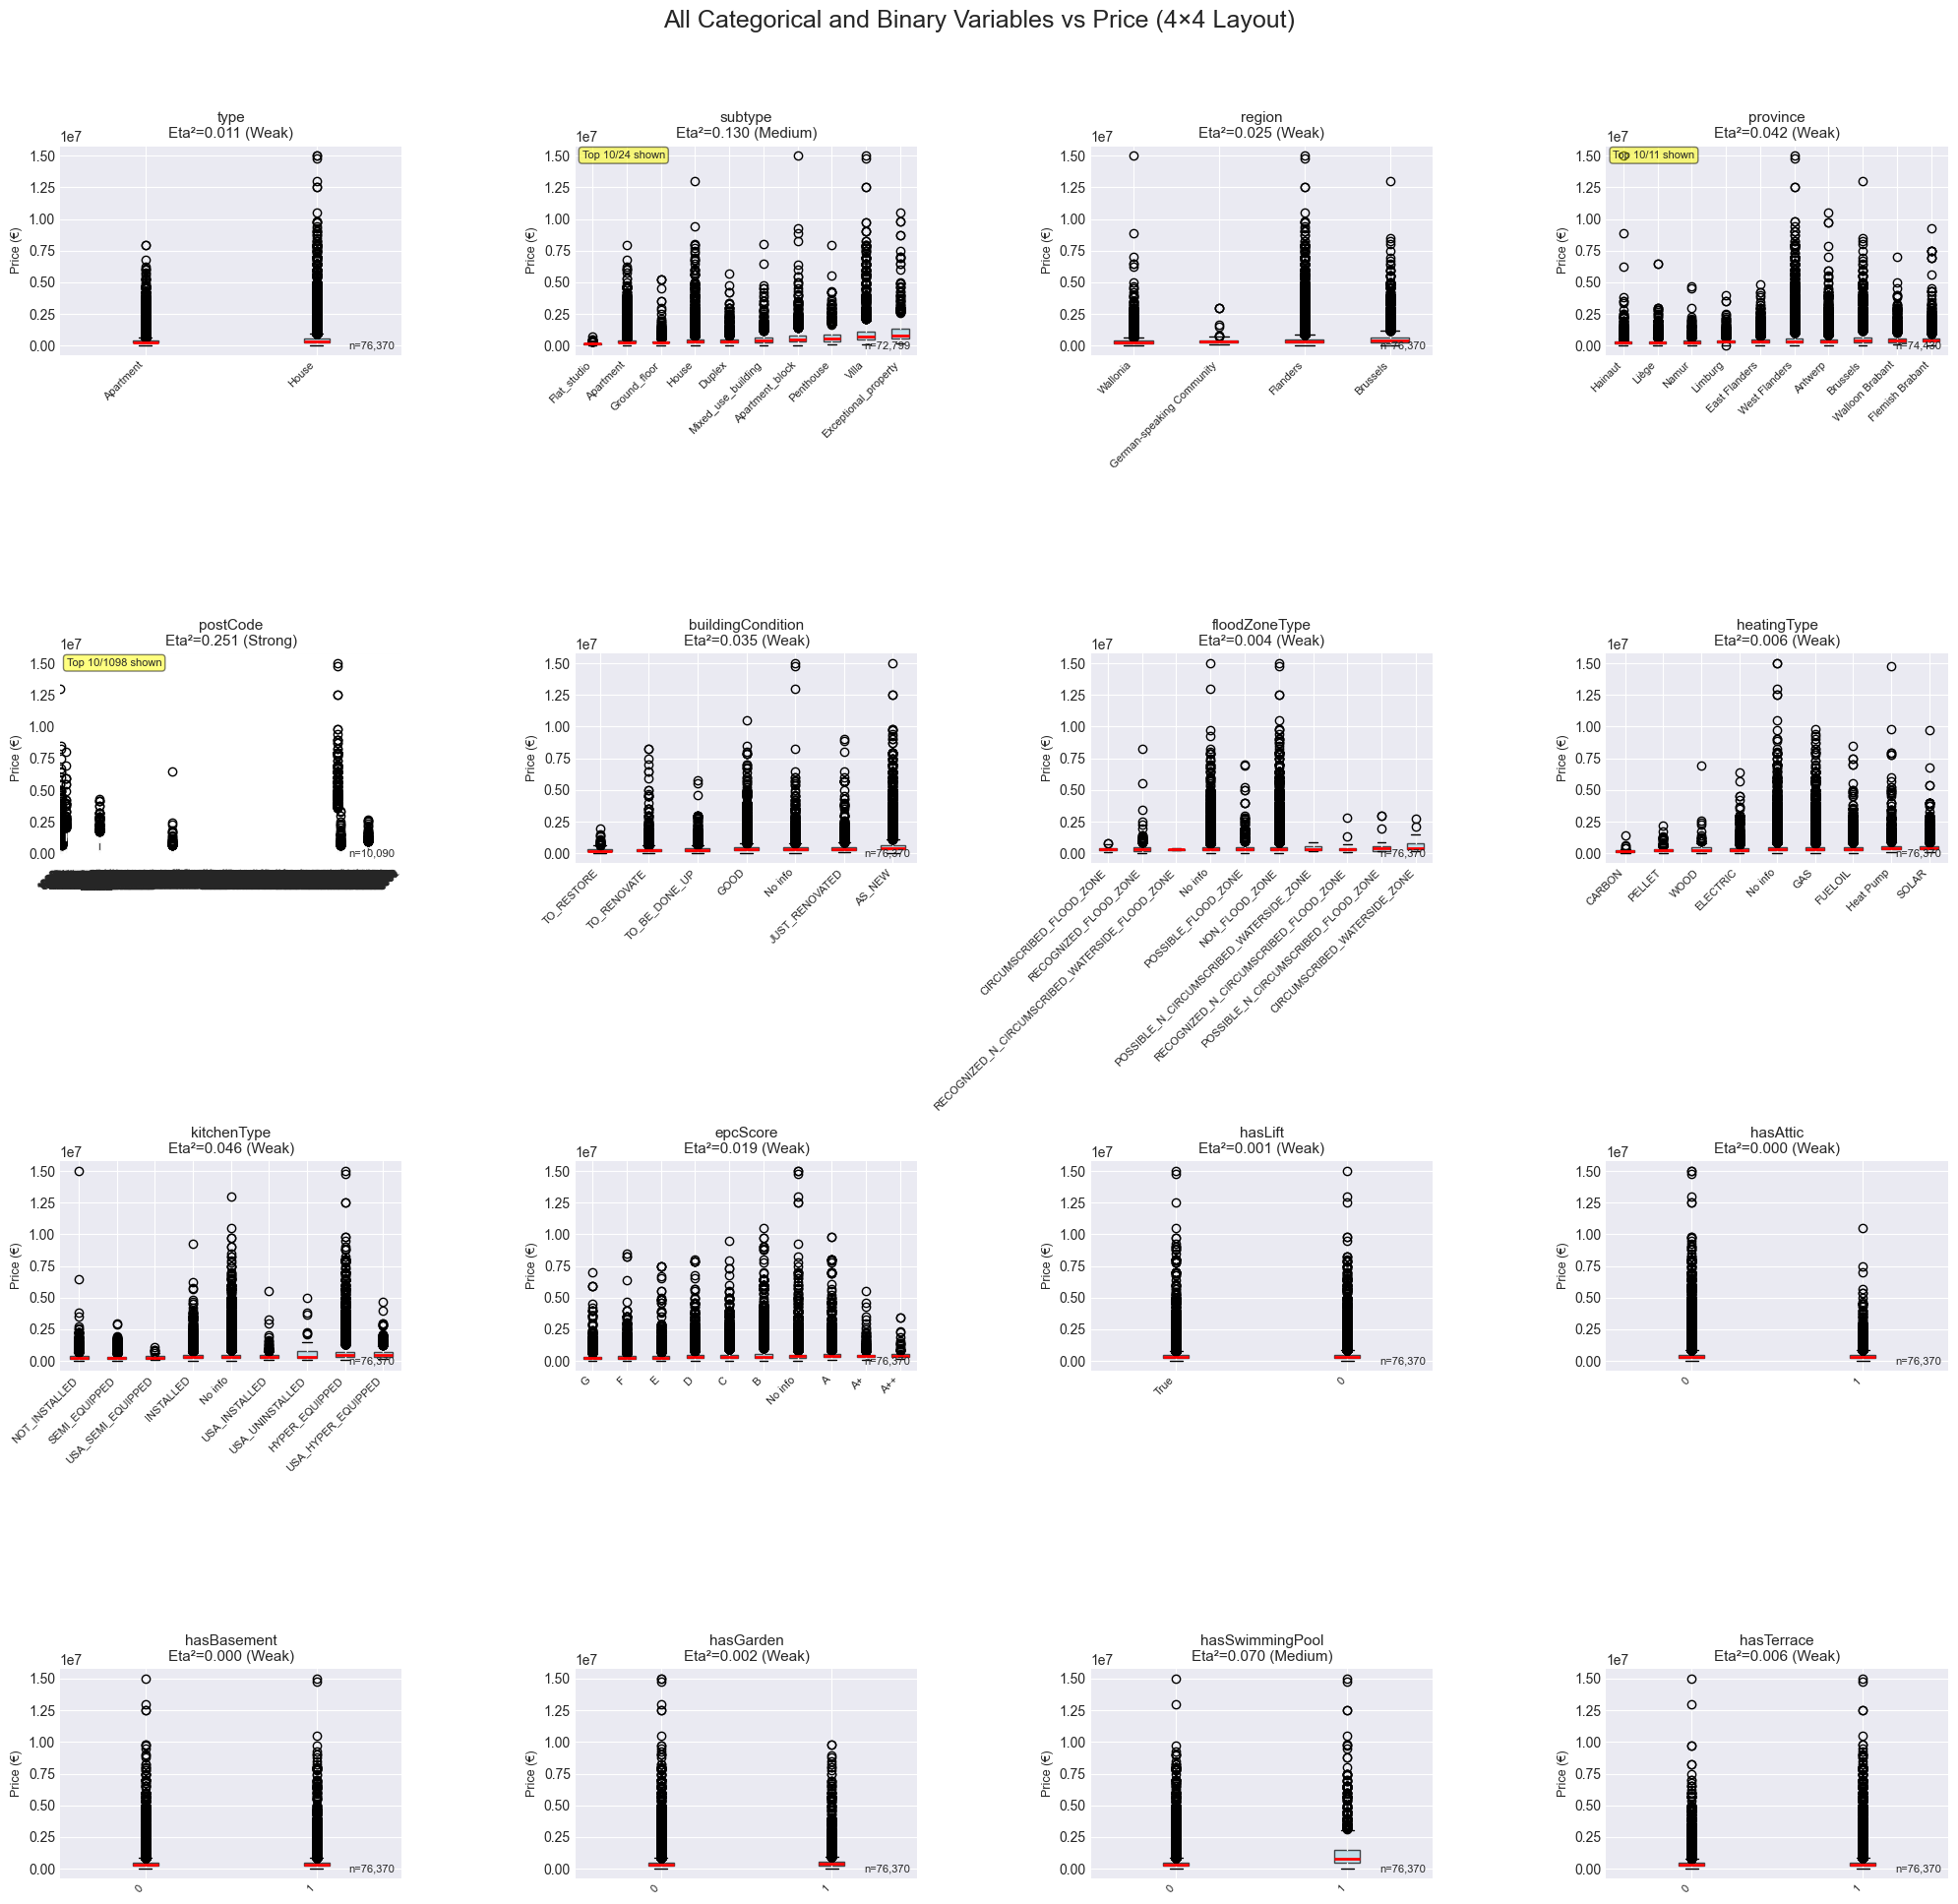


Total categorical variables analyzed: 11
Categorical variables: type, subtype, region, province, postCode, buildingCondition, floodZoneType, heatingType, kitchenType, epcScore, hasLift

Total binary variables analyzed: 5
Binary variables: hasAttic, hasBasement, hasGarden, hasSwimmingPool, hasTerrace

Total variables in visualization: 16

ALL VARIABLES RANKED BY INFLUENCE ON PRICE

TOP 10 MOST INFLUENTIAL VARIABLES:
        Variable        Type  Effect Size     Metric Interpretation
    bedroomCount     Numeric     0.368599  r = 0.369         Strong
        postCode Categorical     0.250572 η² = 0.251         Strong
     landSurface     Numeric     0.226146  r = 0.226         Medium
         subtype Categorical     0.130188 η² = 0.130         Medium
   bathroomCount     Numeric     0.111870  r = 0.112         Medium
habitableSurface     Numeric     0.097872  r = 0.098           Weak
     toiletCount     Numeric     0.095787  r = 0.096           Weak
 hasSwimmingPool Categorical     0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# Load the dataset
df = pd.read_csv('Cleaned - immoweb-dataset.csv')

# define variable types
binary_vars = ['hasAttic', 'hasBasement', 'hasGarden', 'hasSwimmingPool', 'hasTerrace']
categorical_vars = ['type','subtype', 'region', 'province', 'postCode','buildingCondition', 
                   'floodZoneType', 'heatingType', 'kitchenType', 'epcScore', 'hasLift']
numeric_vars = ['bedroomCount', 'bathroomCount', 'habitableSurface', 'landSurface',
                'parkingCountIndoor', 'parkingCountOutdoor', 'toiletCount', 'price']

#convert bibary vars to categorical
for var in binary_vars:
    df[var]=df[var].astype('category')

#convert postcode to categorical
df["postCode"] = df["postCode"].astype("category")

#convert haslift to categorical if it's boolean
if df['hasLift'].dtype == 'bool':
    df['hasLift'] = df['hasLift'].astype('categoty')

# Clean numeric columns in place (replace 'No info' with NaN)
print("\nCleaning numeric columns...")
for col in numeric_vars:
    if col in df.columns and df[col].dtype == 'object':
        # Count 'No info' values before cleaning
        no_info_count = (df[col] == 'No info').sum()
        if no_info_count > 0:
            print(f"  - {col}: Converting {no_info_count} 'No info' values to NaN")
        # Replace 'No info' with NaN and convert to numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify we still have 24 columns, and length of rows and columns, qualitative and quantitative variables 
print(f"Dataset shape after cleaning: {df.shape}")

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nQualitative variables: {len(categorical_vars) + len(binary_vars)}")
print(f"Quantitative variables: {len(numeric_vars)}")


# Calculate missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_data = []
for col in df.columns:
    # For object columns, check for null and 'No info'
    if df[col].dtype == 'object':
        null_count = df[col].isnull().sum()
        no_info_count = (df[col] == 'No info').sum()
        total_missing = null_count + no_info_count
    else:
        # For numeric columns, only check for null (No info already converted to NaN)
        total_missing = df[col].isnull().sum()
    
    percentage = (total_missing / len(df)) * 100
    if percentage > 0:
        missing_data.append({
            'Column': col,
            'Missing Count': total_missing,
            'Percentage': percentage
        })

missing_df = pd.DataFrame(missing_data).sort_values('Percentage', ascending=False)
print(missing_df.to_string())




#=============================================================visualization========================================================================


# ================================ Visualization 1: Dataset Overview with 2 subplots ==============================================
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Dataset dimensions visualization
dims_data = ['Rows', 'Columns']
dims_values = [len(df), len(df.columns)]
bars1 = ax1.bar(dims_data, dims_values, color=['skyblue', 'lightcoral'])
ax1.set_title('Dataset Dimensions', fontsize=16, fontweight='bold')
ax1.set_ylabel('Count')
for i, (bar, val) in enumerate(zip(bars1, dims_values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{val:,}', ha='center', va='bottom', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(dims_values) * 1.2)

# 2. Variable types visualization
var_types = ['Qualitative\n(Categorical + Binary)', 'Quantitative\n(Numeric)']
var_counts = [len(categorical_vars) + len(binary_vars), len(numeric_vars)]
colors = ['#ff9999', '#66b3ff']
wedges, texts, autotexts = ax2.pie(var_counts, labels=var_types, colors=colors, 
                                    autopct='%1.0f%%', startangle=90, 
                                    textprops={'fontsize': 12})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Variable Types Distribution', fontsize=16, fontweight='bold')
# Add counts to labels
ax2.text(0, -1.3, f'Total Variables: {sum(var_counts)}', ha='center', fontsize=12)

# 3. Missing values percentage bar chart
missing_sorted = missing_df[missing_df['Percentage'] > 0].sort_values('Percentage', ascending=True)
bars3 = ax3.barh(missing_sorted['Column'], missing_sorted['Percentage'], color='coral')
ax3.set_xlabel('Missing Percentage (%)', fontsize=12)
ax3.set_title('Percentage of Missing Values per Column', fontsize=16, fontweight='bold')
ax3.set_xlim(0, 50)
for i, (bar, pct) in enumerate(zip(bars3, missing_sorted['Percentage'])):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', ha='left', va='center', fontsize=10)

# 4. Summary statistics table
summary_data = [
    ['Total Rows', f'{len(df):,}'],
    ['Total Columns', f'{len(df.columns)}'],
    ['Qualitative Variables', f'{len(categorical_vars) + len(binary_vars)}'],
    ['Quantitative Variables', f'{len(numeric_vars)}'],
    ['Columns with Missing Data', f'{len(missing_sorted)}'],
    ['Highest Missing %', f'{missing_sorted["Percentage"].max():.1f}% ({missing_sorted.iloc[-1]["Column"]})']
]

ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=summary_data, 
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)
ax4.set_title('Dataset Summary', fontsize=16, fontweight='bold', pad=20)

# Style the table
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('#4CAF50')
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')

plt.suptitle('DATASET OVERVIEW', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()




# ==================================== Function to plot numeric variables with outlier information ========================================

def plot_numeric_with_outliers(df, col, ax):
    """Plot numeric variable with outlier information"""
    data = df[col].dropna()  #drop NaN values, only analysis meaningful values
    
    # If no data, show message and return
    if len(data) == 0: # check if the column is a fully empty column
        ax.text(0.5, 0.5, f'No data available for {col}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{col} - No Data') #change title to No data
        return
    
    # Calculate outliers using Interquartile Range method.Calculate Q1, Q3 and IQR
    Q1 = data.quantile(0.25) # 25% data < Q1
    Q3 = data.quantile(0.75) # 75% data < Q3
    IQR = Q3 - Q1 # range of 50% data in the middle 
    lower_bound = Q1 - 1.5 * IQR # lower limit calculating way, if lower than this, then it is outlier below
    upper_bound = Q3 + 1.5 * IQR # upper limit calculating way, if upper than this, then is is outlier above
    
    # Count outliers below and above the limits
    outliers_below = (data < lower_bound).sum() #True = 1, False = 0
    outliers_above = (data > upper_bound).sum()
    
    # Draw horizontal boxplot with styling
    ax.boxplot(data, vert=False, patch_artist=True, # horizontal, with color
               boxprops=dict(facecolor='lightblue', alpha=0.7), #box color
               medianprops=dict(color='red', linewidth=2)) # median color and line
    
     # Annotate counts of outliers on the plot
    ax.text(0.02, 0.95, f'Below lower limit: {outliers_below}', 
            transform=ax.transAxes, va='top', fontsize=10)
    ax.text(0.02, 0.85, f'Above upper limit: {outliers_above}', 
            transform=ax.transAxes, va='top', fontsize=10)
    
    # Set x-axis label and title
    ax.set_xlabel(col)
    ax.set_title(f'{col} Distribution with Outliers', fontsize=12)


# ============================================ Visualization 2: Numeric Variables with Outliers =======================================================

# Create subplots (4 rows x 2 cols) and flatten axes array
fig, axes = plt.subplots(4, 2, figsize=(15, 12)) # 8 subplots for 8 numeric columns
axes = axes.ravel() # make sure subplot is one dimensional array

# Loop through numeric variables and plot each
for i, col in enumerate(numeric_vars):
    if i < len(axes):
        plot_numeric_with_outliers(df, col, axes[i]) # draw {i} column in {i} plot 

# Overall title and layout adjustment
plt.suptitle('Numeric Variables Distribution with Outlier Counts', fontsize=16) #suptitle for whole plot
plt.tight_layout()
plt.show()


# ============================================= Comprehensive Correlation Analysis(numeric)  - using corr ===========================================================

# Print separator and title for correlation analysis
print("\n" + "="*80)
print("COMPREHENSIVE CORRELATION ANALYSIS WITH PRICE")
print("="*80)

# 1. Get only numeric columns for correlation
# Select numeric dtype columns from the DataFrame
numeric_df = df[numeric_vars].select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr() # using corr matrix to get correlations of all numericals

# Get correlations with price if exists
if 'price' in corr_matrix.columns:
    # Extract correlations with 'price', drop self-correlation, sort descending
    price_correlations_numeric = corr_matrix['price'].drop('price').sort_values(ascending=False)
    print("\n1. NUMERIC VARIABLES - Correlation with Price:")
    # Print each variable and its correlation coefficient
    for var, corr in price_correlations_numeric.items():
        print(f"{var}: {corr:.4f}") # loop correlated variables and keep 4 digits after the decimal point

# Calculate correlations of numeric
print("\n" + "="*80)
print("CORRELATION ANALYSIS(numeric) WITH PRICE")
print("="*80)

# Get only numeric columns for correlation
numeric_df = df[numeric_vars].select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Get correlations with price
if 'price' in corr_matrix.columns:
    price_correlations = corr_matrix['price'].drop('price').sort_values(ascending=False)
    print("\nCorrelations with Price (sorted by absolute value):")
    for var, corr in price_correlations.items():
        print(f"{var}: {corr:.4f}")
    
    # Identify greatest and least influences
    strong_influence = price_correlations[abs(price_correlations) > 0.3]
    weak_influence = price_correlations[abs(price_correlations) < 0.1]
    
    print(f"\nVariables with GREATEST influence on price (|correlation| > 0.3):")
    for var, corr in strong_influence.items():
        print(f"  - {var}: {corr:.4f}")
    
    print(f"\nVariables with LEAST influence on price (|correlation| < 0.1):")
    for var, corr in weak_influence.items():
        print(f"  - {var}: {corr:.4f}")

# ================================================= Visualization 3: Correlation (numeric) with price ==========================================================
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Correlation with Price - Bar Chart
ax1 = fig.add_subplot(gs[0, :2])
price_corr_sorted = price_correlations.reindex(price_correlations.abs().sort_values(ascending=True).index)
colors = ['darkgreen' if x > 0.3 else 'green' if x > 0.1 else 'orange' if x > -0.1 else 'red' 
          for x in price_corr_sorted.values]
bars = ax1.barh(range(len(price_corr_sorted)), price_corr_sorted.values, color=colors, alpha=0.8)

ax1.set_yticks(range(len(price_corr_sorted)))
ax1.set_yticklabels(price_corr_sorted.index)
ax1.set_xlabel('Correlation with Price', fontsize=12)
ax1.set_title('Variables Correlation with Price (Colored by Strength)', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax1.axvline(x=0.3, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=-0.3, color='gray', linestyle='--', alpha=0.5)

# Add value labels
for i, (value, bar) in enumerate(zip(price_corr_sorted.values, bars)):
    ax1.text(value + 0.01 if value > 0 else value - 0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', ha='left' if value > 0 else 'right', va='center', fontsize=9)

# 2. Influence Categories
ax2 = fig.add_subplot(gs[0, 2])
influence_data = {
    'Greatest Influence\n(|r| > 0.3)': len(price_correlations[abs(price_correlations) > 0.3]),
    'Moderate Influence\n(0.1 < |r| < 0.3)': len(price_correlations[(abs(price_correlations) > 0.1) & (abs(price_correlations) <= 0.3)]),
    'Least Influence\n(|r| < 0.1)': len(price_correlations[abs(price_correlations) <= 0.1])
}
colors_pie = ['darkgreen', 'orange', 'red']
wedges, texts, autotexts = ax2.pie(influence_data.values(), labels=influence_data.keys(), 
                                    colors=colors_pie, autopct='%1.0f', startangle=90)
ax2.set_title('Variables by Influence Level', fontsize=14, fontweight='bold')

# 3. Correlation Heatmap
ax3 = fig.add_subplot(gs[1:, :2])
# Select top correlated variables for cleaner visualization
top_vars_idx = price_correlations.abs().nlargest(min(8, len(price_correlations))).index
top_vars = ['price'] + list(top_vars_idx)
# Only include variables that exist in the correlation matrix
top_vars = [v for v in top_vars if v in corr_matrix.columns]
corr_subset = corr_matrix.loc[top_vars, top_vars]

mask = np.triu(np.ones_like(corr_subset, dtype=bool), k=1)
sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='RdBu_r', 
            center=0, square=True, mask=mask, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax3, annot_kws={'size': 10})
ax3.set_title('Correlation Matrix - Top Variables', fontsize=14, fontweight='bold')




# ===================================== Comprehensive Correlation Analysis(category) - using ANOVA F-statistic and Eta-squared ============================================

print("\n2. CATEGORICAL VARIABLES - Association with Price (ANOVA):")
categorical_results = []

# Loop through each categorical and binary variable
for var in categorical_vars + binary_vars:
    if var in df.columns:
        # Remove missing values for ANOVA test
        temp_df = df[[var, 'price']].dropna()
        
       # Only proceed if there is at least one row of data AND at least two distinct categories to compare
        if len(temp_df) > 0 and len(temp_df[var].unique()) > 1:
        # temp_df.groupby(var) splits the DataFrame into one subgroup per unique category in `var`
        # The list comprehension below collects each subgroup’s 'price' values into a NumPy array
        # Resulting `groups` is a list of 1D arrays, one array per category
            groups = [group['price'].values for _, group in temp_df.groupby(var)]
    
        # Perform a one-way ANOVA (analysis of variance) test across these groups
        # - The asterisk (*) unpacks the list so that each array becomes a separate argument
        # - stats.f_oneway returns:
        #     f_stat   : the F-statistic (ratio of between-group to within-group variability)
        #     p_value  : the probability of observing such an F under the null hypothesis
        # A small p_value (e.g., < 0.05) suggests the group means differ significantly
            f_stat, p_value = stats.f_oneway(*groups)
            
            # Calculate Eta-squared as effect size
            grand_mean = temp_df['price'].mean()  # overall average price
            ss_total = np.sum((temp_df['price'] - grand_mean) ** 2)  # total sum of squares
            ss_between = sum(
                len(group) * (group.mean() - grand_mean) ** 2
                for group in groups
            )  # between-group sum of squares
            eta_squared = ss_between / ss_total if ss_total > 0 else 0
            
            # Record results with interpretation
            categorical_results.append({
                'Variable': var,
                'F-statistic': f_stat,
                'p-value': p_value,
                'Eta-squared': eta_squared,
                'Effect': (
                    'Strong' if eta_squared > 0.14 else
                    'Medium' if eta_squared > 0.06 else
                    'Weak'
                )
            })

# Convert to DataFrame and sort by effect size
categorical_df = pd.DataFrame(categorical_results).sort_values('Eta-squared', ascending=False)
print("\nEffect size interpretation: Weak < 0.06, Medium 0.06-0.14, Strong > 0.14")
# Display the full table of categorical variable effects
print(categorical_df.to_string())


# ===============================================  Visualization 4: categorical variables' relationship with price ==============================================

# Display all categorical and binary variables in one grid of boxplots
# Combine lists of categorical and binary variables
all_categorical_vars = categorical_vars + binary_vars  # e.g., total 16 variables to plot
n_vars = len(all_categorical_vars)  # number of variables to visualize

# Create a 4x4 grid of subplots with a large figure size
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
# Flatten the 2D array of Axes into a 1D list for easy indexing
axes = axes.ravel()

# Inform the user how many plots will be created
print(f"\nCreating boxplots for {n_vars} categorical/binary variables...")

# Loop over each variable and corresponding subplot
for i, var in enumerate(all_categorical_vars):
    # Only proceed if we have an available subplot slot and the column exists in df
    if i < len(axes) and var in df.columns:
        ax = axes[i]
        
        # Subset the DataFrame to the current variable and price, dropping missing values
        temp_df = df[[var, 'price']].dropna()
        
        if len(temp_df) > 0:
            # If there are more than 10 unique categories, keep only the top 10 by frequency
            if len(temp_df[var].unique()) > 10:
                top_categories = temp_df[var].value_counts().head(10).index
                temp_df = temp_df[temp_df[var].isin(top_categories)]
                # Annotate the plot to show that only top 10 of all categories are displayed
                ax.text(
                    0.02, 0.98,
                    f'Top 10/{len(df[var].unique())} shown',
                    transform=ax.transAxes,
                    va='top', fontsize=8,
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5)
                )
            
            # Sort categories by their median price for more meaningful boxplot order
            medians = temp_df.groupby(var)['price'].median().sort_values()
            temp_df[var] = pd.Categorical(
                temp_df[var],
                categories=medians.index,
                ordered=True
            )
            
            # Draw a horizontal boxplot of price grouped by current variable
            temp_df.boxplot(
                column='price',
                by=var,
                ax=ax,
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),  # light blue fill
                medianprops=dict(color='red', linewidth=2)         # red median line
            )
            
            # Retrieve Eta-squared effect size and qualitative label if available
            eta_sq_row = categorical_df[categorical_df['Variable'] == var]
            if not eta_sq_row.empty:
                eta_sq = eta_sq_row['Eta-squared'].values[0]
                effect = eta_sq_row['Effect'].values[0]
                ax.set_title(f'{var}\nEta²={eta_sq:.3f} ({effect})', fontsize=11)
            else:
                ax.set_title(f'{var}', fontsize=11)
            
            # Remove automatic x-axis label, set y-axis label
            ax.set_xlabel('')
            ax.set_ylabel('Price (€)', fontsize=9)
            
            # Hide pandas-generated suptitle for this subplot
            ax.get_figure().suptitle('')
            
            # Rotate x-axis labels to avoid overlap
            plt.setp(
                ax.xaxis.get_majorticklabels(),
                rotation=45, ha='right', fontsize=8
            )
            
            # Add a small text annotation showing the number of samples plotted
            n_samples = len(temp_df)
            ax.text(
                0.98, 0.02,
                f'n={n_samples:,}',
                transform=ax.transAxes,
                ha='right', va='bottom', fontsize=8
            )
        else:
            # If no data is available for this variable, show a placeholder message
            ax.text(
                0.5, 0.5,
                f'No data for {var}',
                ha='center', va='center',
                transform=ax.transAxes
            )
            ax.set_title(f'{var}', fontsize=11)

# In case we have more subplot axes than variables, hide any unused axes
for i in range(len(all_categorical_vars), len(axes)):
    axes[i].axis('off')

# Add a main title for the entire figure and adjust layout
plt.suptitle(
    'All Categorical and Binary Variables vs Price (4×4 Layout)',
    fontsize=18, y=0.995
)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Print a summary of which variables were analyzed
print(f"\nTotal categorical variables analyzed: {len(categorical_vars)}")
print("Categorical variables:", ', '.join(categorical_vars))
print(f"\nTotal binary variables analyzed: {len(binary_vars)}")
print("Binary variables:", ', '.join(binary_vars))
print(f"\nTotal variables in visualization: {len(all_categorical_vars)}")


# ====================================================== All variables ranked by influence on price ==================================================================

print("\n" + "="*80)
print("ALL VARIABLES RANKED BY INFLUENCE ON PRICE")
print("="*80)

all_variables = []

# add numeric variables
for var, corr in price_correlations.items():
    all_variables.append({
        'Variable': var,
        'Type': 'Numeric',
        'Effect Size': abs(corr),
        'Metric': f'r = {corr:.3f}',
        'Interpretation': 'Strong' if abs(corr) > 0.3 else 'Medium' if abs(corr) > 0.1 else 'Weak'
    })

# add category variables
for _, row in categorical_df.iterrows():
    all_variables.append({
        'Variable': row['Variable'],
        'Type': 'Categorical',
        'Effect Size': row['Eta-squared'],
        'Metric': f'η² = {row["Eta-squared"]:.3f}',
        'Interpretation': row['Effect']
    })

all_vars_df = pd.DataFrame(all_variables).sort_values('Effect Size', ascending=False)
print("\nTOP 10 MOST INFLUENTIAL VARIABLES:")
print(all_vars_df.head(10).to_string(index=False))
    



*** POSTCODE ***


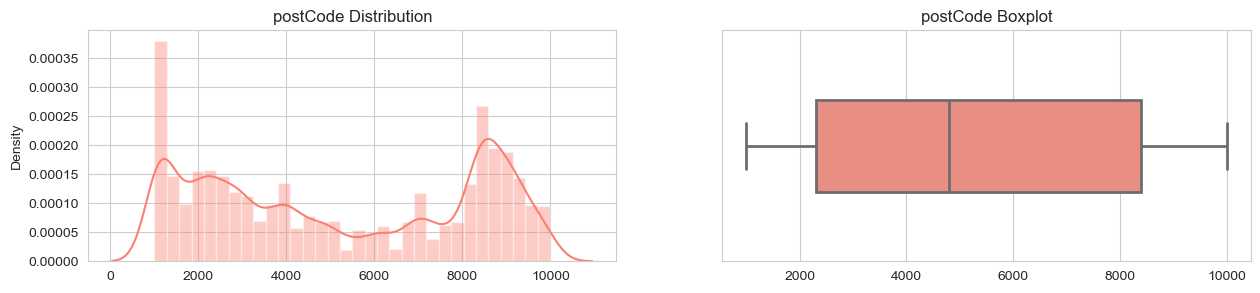


*** HASATTIC ***


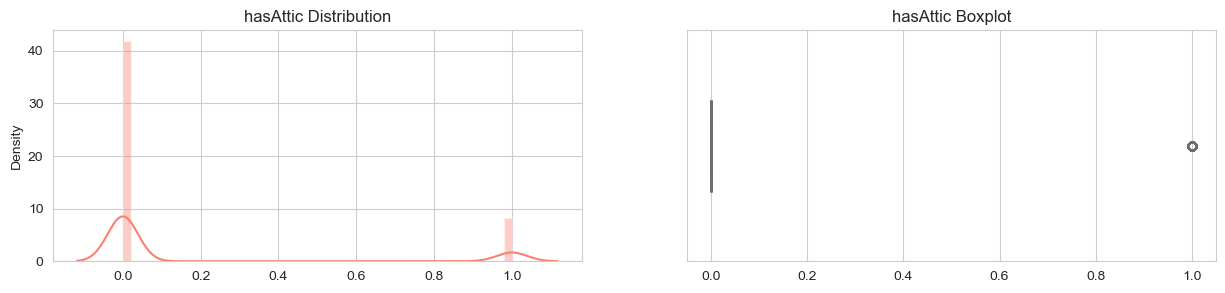


*** HASBASEMENT ***


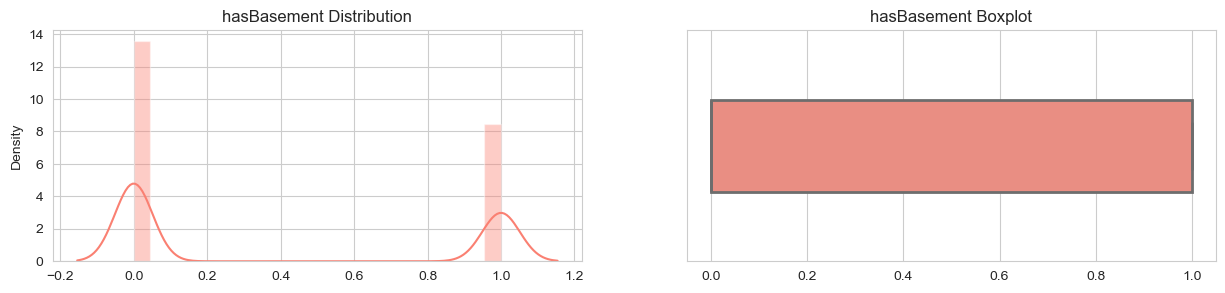


*** HASGARDEN ***


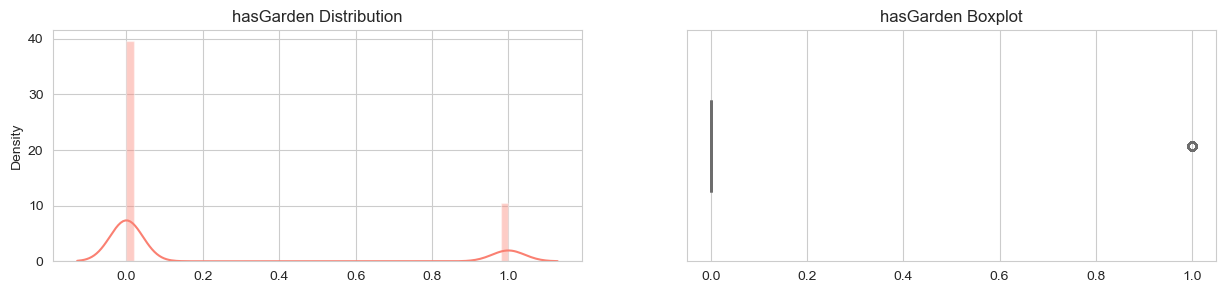


*** GARDENSURFACE ***


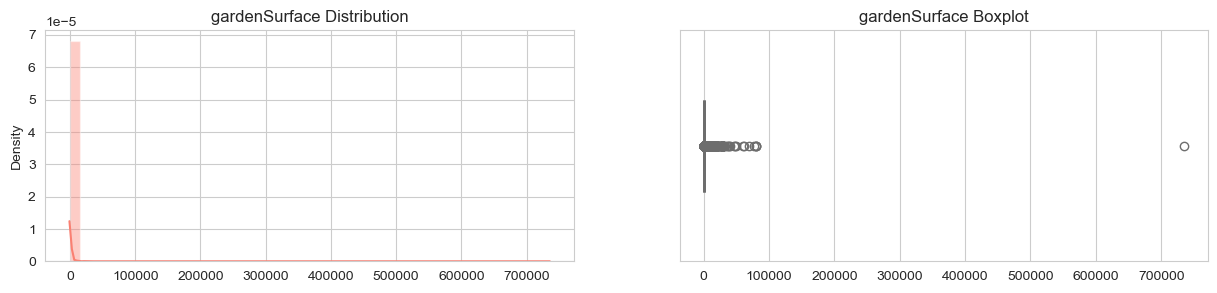


*** PARKINGCOUNTINDOOR ***


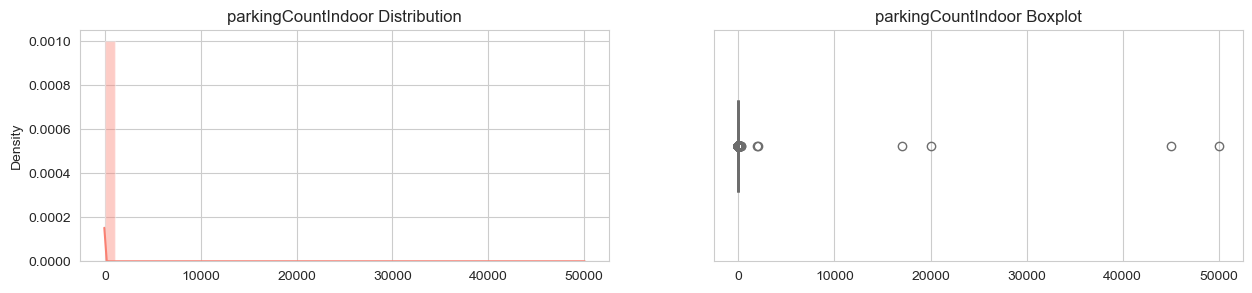


*** PARKINGCOUNTOUTDOOR ***


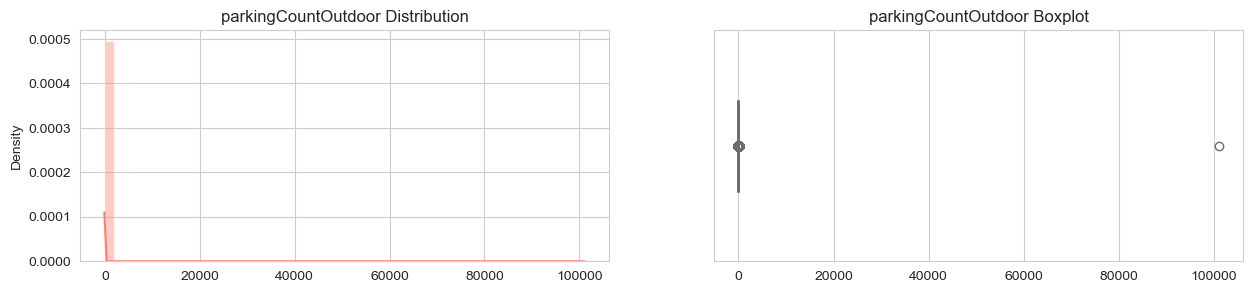


*** HASSWIMMINGPOOL ***


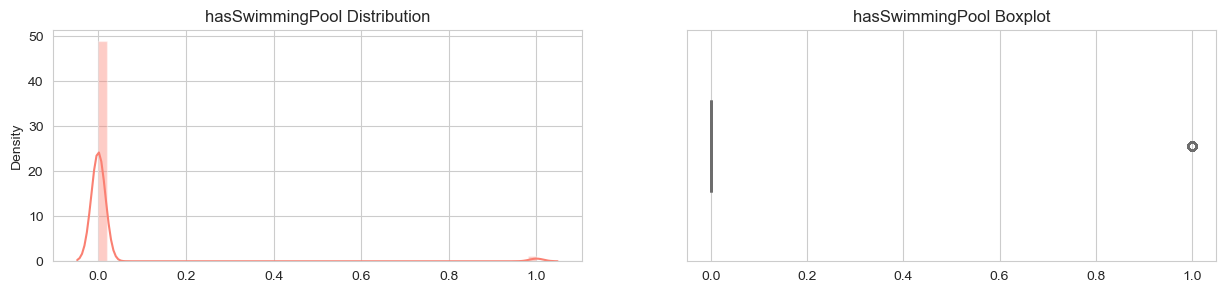


*** HASTERRACE ***


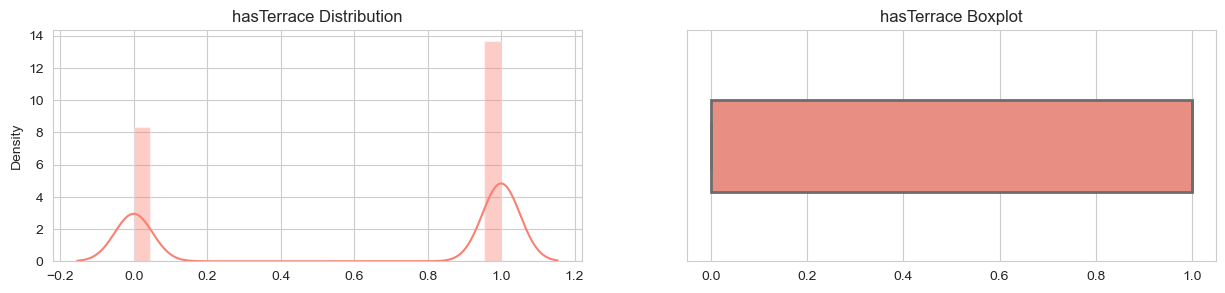


*** PRICE ***


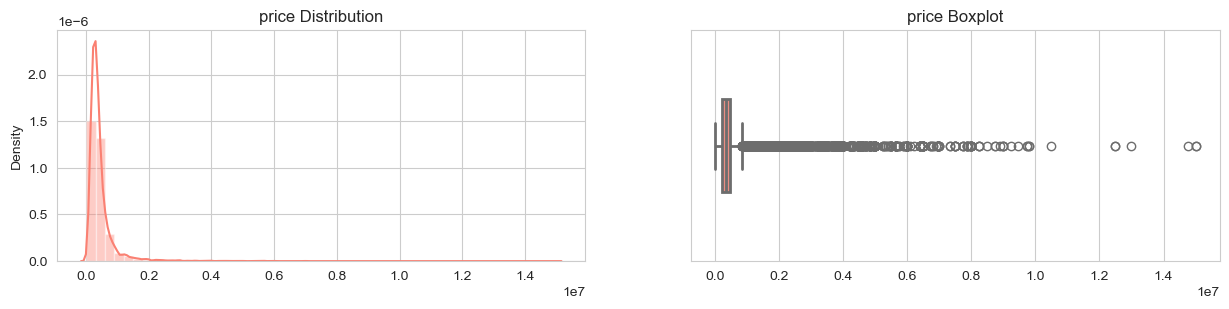

In [17]:
for i in numeric_cols:
    Plot_numeric(i)


*** TYPE ***


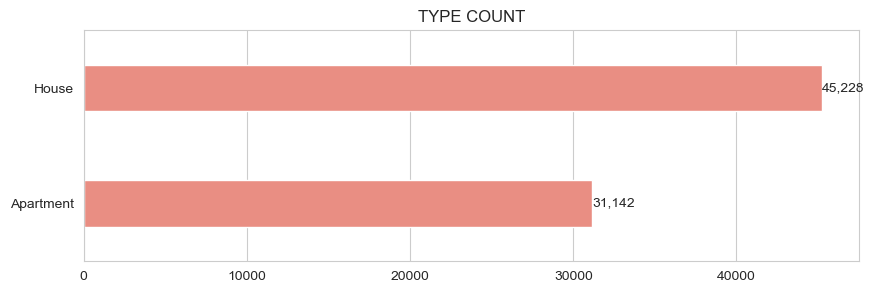


*** SUBTYPE ***


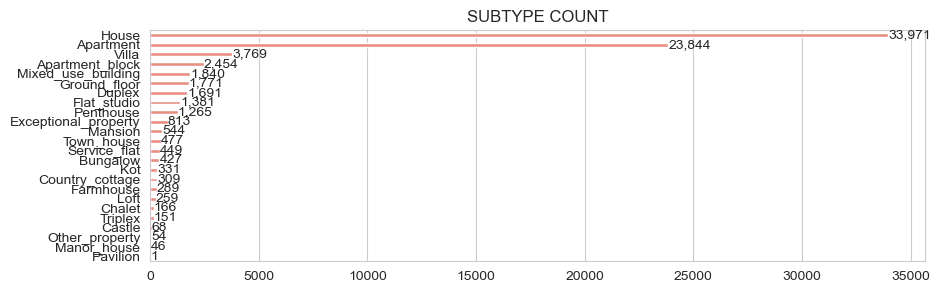


*** BEDROOMCOUNT ***


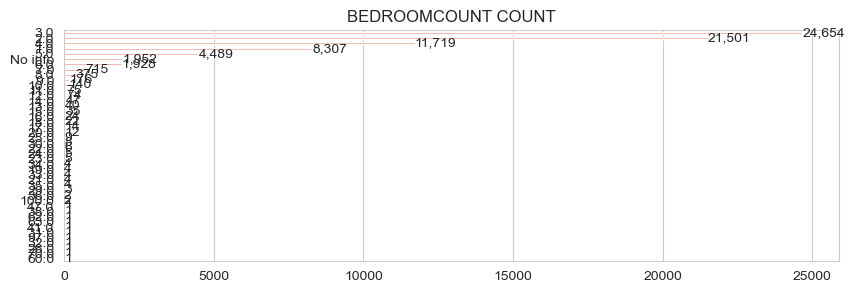


*** BATHROOMCOUNT ***


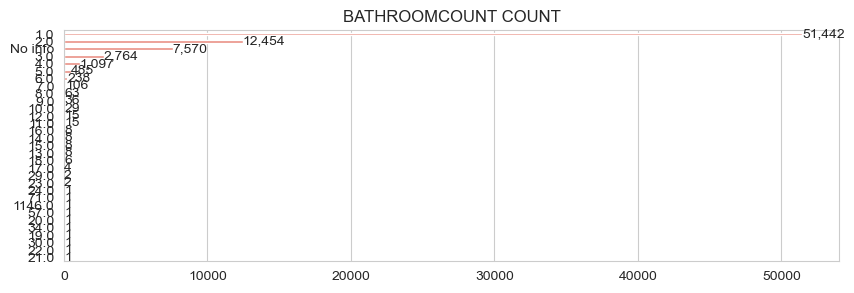


*** REGION ***


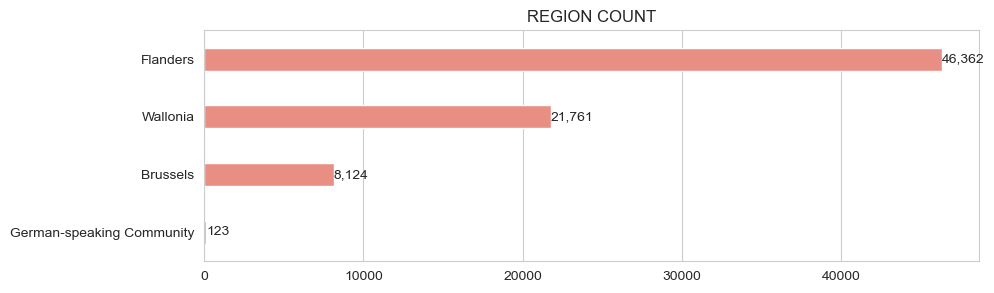


*** PROVINCE ***


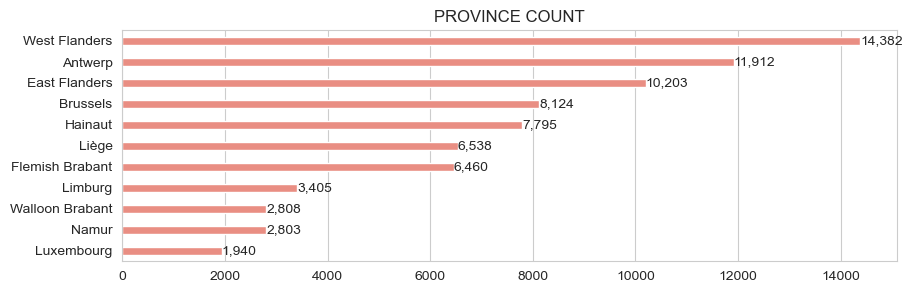


*** LOCALITY ***


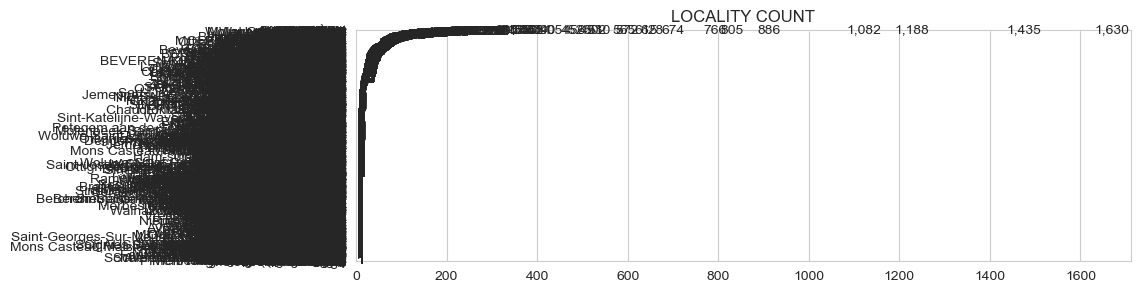


*** HABITABLESURFACE ***


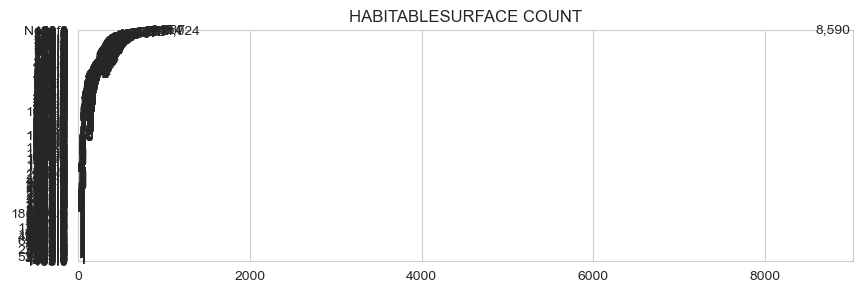


*** BUILDINGCONDITION ***


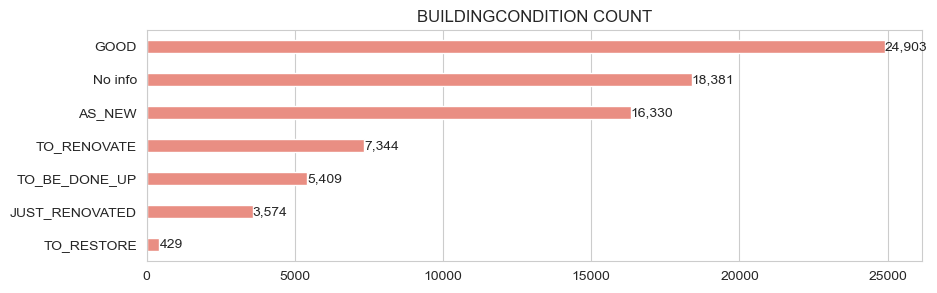


*** BUILDINGCONSTRUCTIONYEAR ***


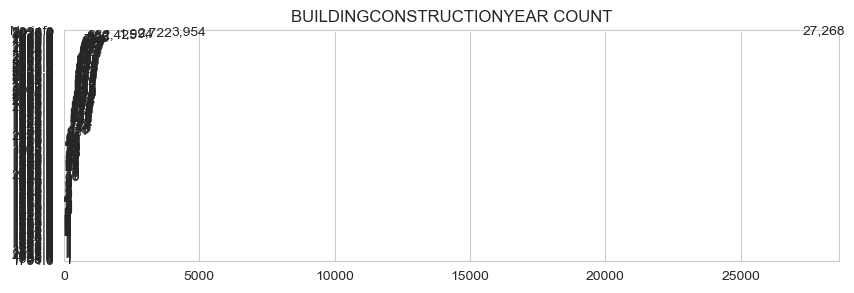


*** HASLIFT ***


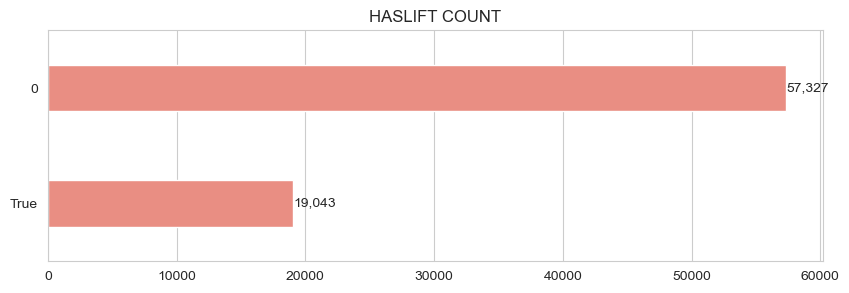


*** FLOODZONETYPE ***


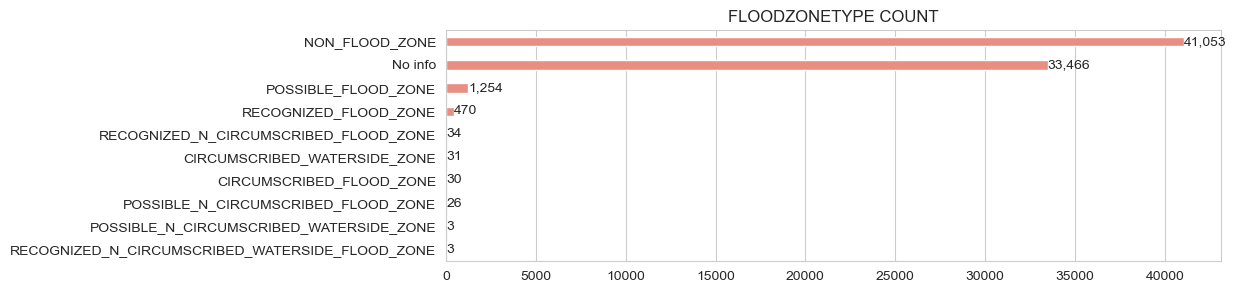


*** HEATINGTYPE ***


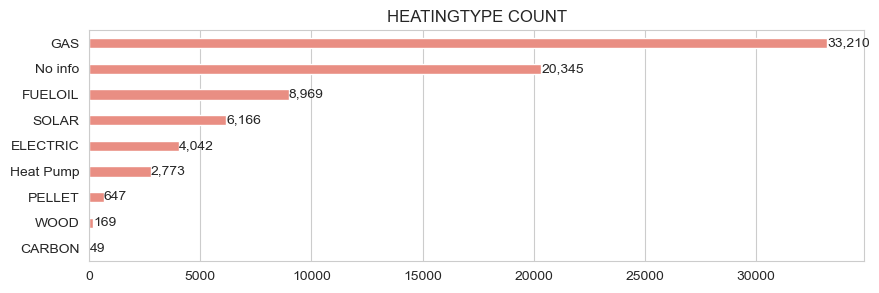


*** KITCHENTYPE ***


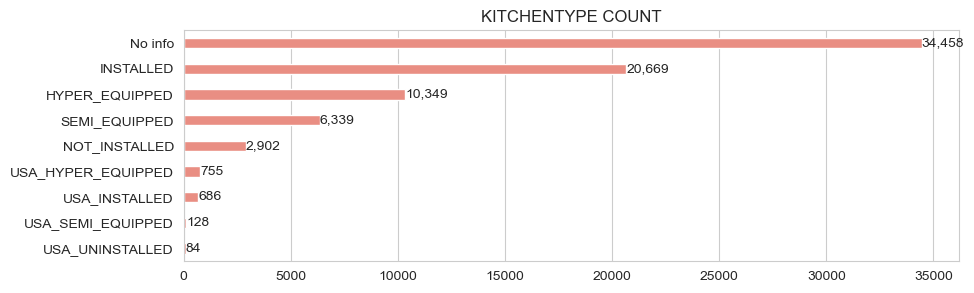


*** LANDSURFACE ***


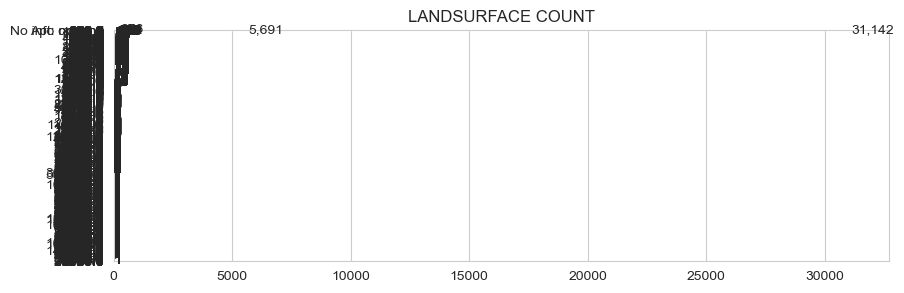


*** GARDENORIENTATION ***


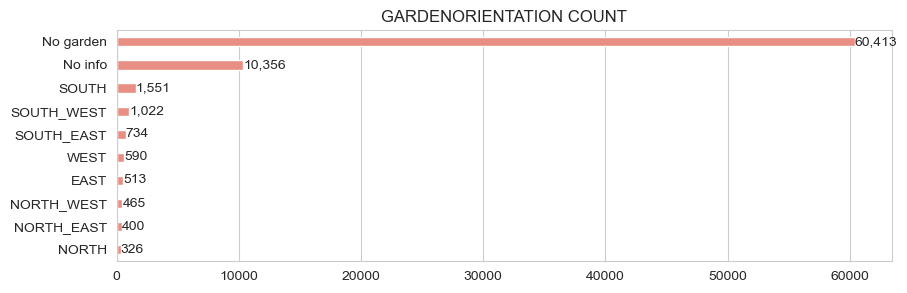


*** TOILETCOUNT ***


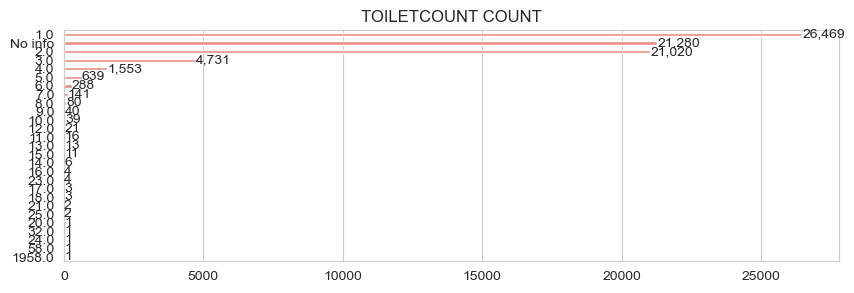


*** TERRACESURFACE ***


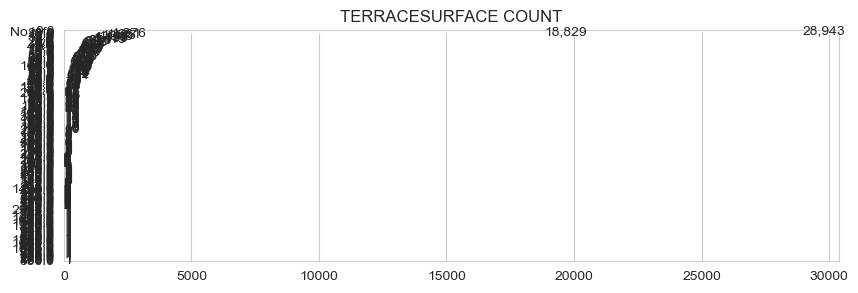


*** TERRACEORIENTATION ***


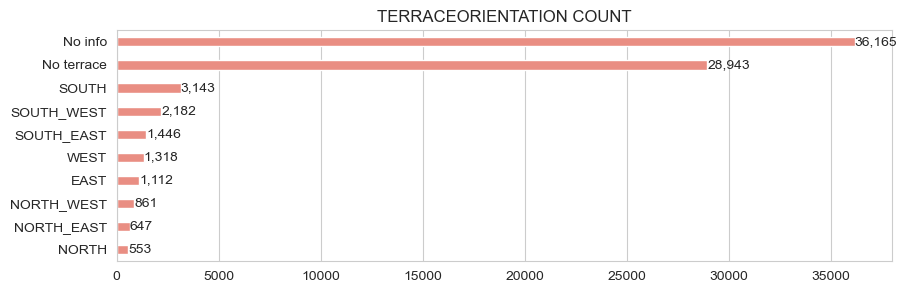


*** EPCSCORE ***


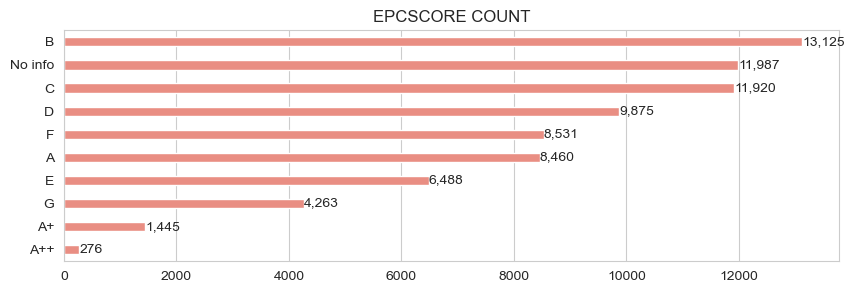

In [21]:
for i in categoric_cols:
    Plot_category(i)

<Axes: >

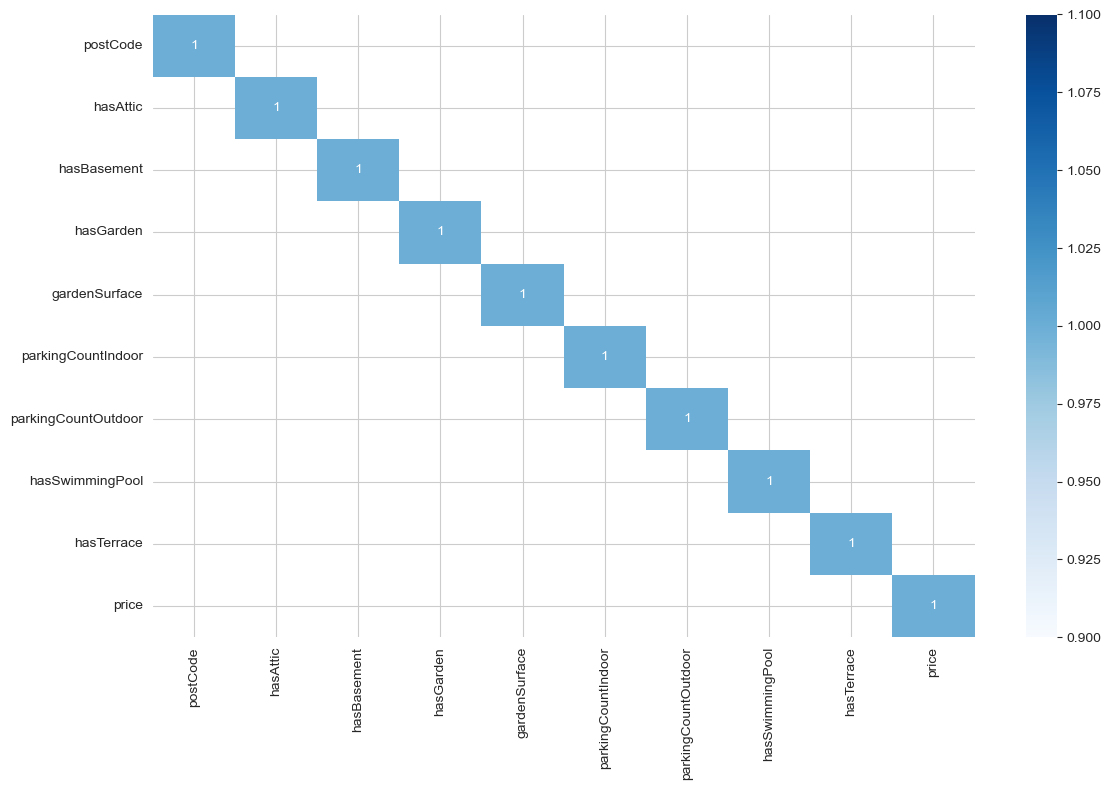

In [22]:
correlations = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12, 8))

# Shows only correlation above +/- 0.3
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)], cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()